# 1. Functions

## 1.1 Function to plot leakage

In [59]:
import matplotlib.pyplot as plt
def plot_leakage(ax, x, leakage, xlabel='X-axis'):
    """
    Plot only leakage on a single axis.

    Parameters:
    ax (matplotlib.axes.Axes): The axis to plot on.
    x (array-like): Data for the x-axis.
    leakage (array-like): Data for leakage on the y-axis.
    xlabel (str): Label for the x-axis.
    """
    # Plot leakage on the primary y-axis
    color = 'tab:red'
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Leakage', color=color)
    ax.plot(x, leakage, 'o--', color=color, label='Leakage')
    ax.tick_params(axis='y', labelcolor=color)
    ax.legend(loc='upper left')


## 1.2 Function to generate list of point to plot

In [60]:
def generate_points_within_range(start, end):
    step = (end - start) / 4
    points = [start + i * step for i in range(5)]
    return points

## 1.3 Function to extract corresponsing leakage

In [61]:
import pandas as pd
import numpy as np

def nearest_values_average(df, numbers, column_name, target_column):
    outputs = []
    for number in numbers:
        nearest_index = (df[column_name] - number).abs().idxmin()  # Find index of nearest value
        nearest_value = df.loc[nearest_index, column_name]  # Get the nearest value
        nearest_indices = df.index[df[column_name] == nearest_value]  # Get indices of all occurrences of nearest value
        average_value = df.loc[nearest_indices, target_column].mean()  # Calculate average of corresponding values in target column
        outputs.append(average_value)
    return outputs


# 2. Generating the range list 

In [62]:
temp_range = [-55,125]
temp_list = generate_points_within_range(temp_range[0],temp_range[1])

In [63]:
pvdd_range = [0.82,0.98]
pvdd_list = generate_points_within_range(pvdd_range[0],pvdd_range[1])

In [64]:
parameters = {
    'toxe': 6.5e-010,
    'toxm': 6.5e-010,
    'toxref': 6.7e-010,
    'toxp_par': 4e-010,
    'xj': 7.2e-009,
    'ndep': 1.2e+019
}

# Ranges for each parameter
ranges = {
    'toxe': (0.9 * parameters['toxe'], 1.1 * parameters['toxe']),
    'toxm': (0.9 * parameters['toxm'], 1.1 * parameters['toxm']),
    'toxref': (0.9 * parameters['toxref'], 1.1 * parameters['toxref']),
    'toxp_par': (0.9 * parameters['toxp_par'], 1.1 * parameters['toxp_par']),
    'xj': (0.9 * parameters['xj'], 1.1 * parameters['xj']),
    'ndep': (0.9 * parameters['ndep'], 1.1 * parameters['ndep'])
}

# Generate points within the specified ranges for each parameter
toxe_list = generate_points_within_range(*ranges['toxe'])
toxm_list = generate_points_within_range(*ranges['toxm'])
toxref_list = generate_points_within_range(*ranges['toxref'])
toxp_par_list = generate_points_within_range(*ranges['toxp_par'])
xj_list = generate_points_within_range(*ranges['xj'])
ndep_list = generate_points_within_range(*ranges['ndep'])

# 3. INVERTER

Loading the File path

In [65]:
file_path = "INVERTER_leakage.csv"  # Provide the path to your CSV file
df_inverter_leakage = pd.read_csv(file_path)

## 3.1 Temparature

In [66]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_inverter_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)


[1.583669501816525e-07, 1.553786760943075e-07, 2.7022076689203096e-07, 2.953680642547472e-07, 8.393289436459946e-07]


## 3.2 Pvdd

In [67]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_inverter_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)


[1.1021645375096656e-07, 1.1021645375096656e-07, 1.1021645375096656e-07, 2.1251790126685864e-07, 2.0215907951667496e-07]


## 3.3 toxe

In [68]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_inverter_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)


[9.988497606731821e-07, 9.988497606731821e-07, 9.988497606731821e-07, 9.988497606731821e-07, 9.988497606731821e-07]


## 3.4 toxm

In [69]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_inverter_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)


[2.988053566767222e-07, 2.988053566767222e-07, 2.988053566767222e-07, 2.988053566767222e-07, 2.988053566767222e-07]


## 3.5 toxref

In [70]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_inverter_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)


[7.652546503887597e-07, 7.652546503887597e-07, 7.652546503887597e-07, 7.652546503887597e-07, 7.652546503887597e-07]


## 3.6 toxp

In [71]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_inverter_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)


[5.433794161179107e-07, 5.433794161179107e-07, 5.433794161179107e-07, 5.433794161179107e-07, 5.433794161179107e-07]


## 3.7 xj

In [72]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_inverter_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)



[2.4490824471408136e-07, 2.4490824471408136e-07, 2.4490824471408136e-07, 2.4490824471408136e-07, 2.4490824471408136e-07]


## 3.8 ndep

In [73]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_inverter_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)


[3.35246077108176e-07, 3.35246077108176e-07, 3.35246077108176e-07, 3.35246077108176e-07, 3.35246077108176e-07]


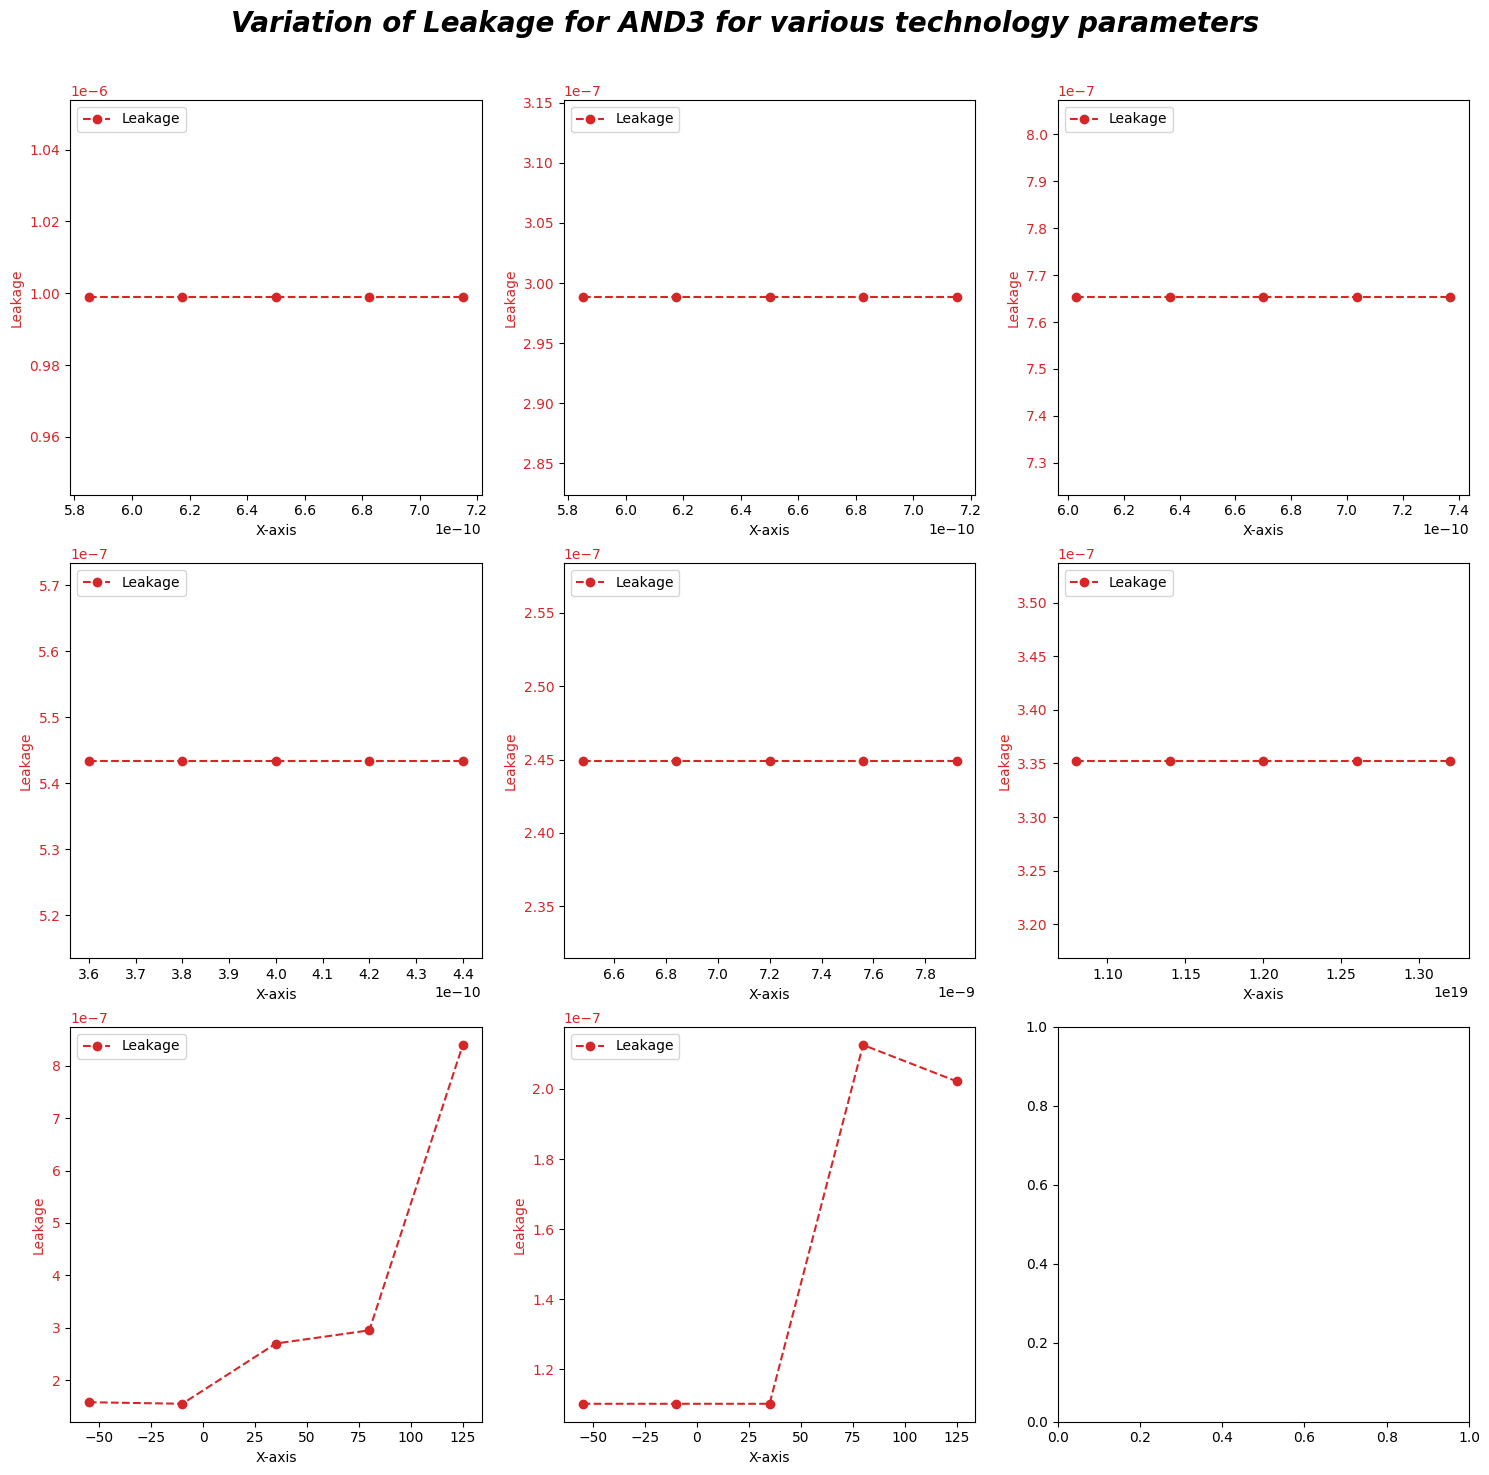

In [74]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data = [
    (axs[0, 0], toxe_list, 'toxe', 'Toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, 'toxm', 'Toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, 'toxref', 'Toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, 'toxp', 'Toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, 'xj', 'Xj', leakage_list_xj),
    (axs[1, 2], ndep_list, 'ndep', 'Ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, 'TEMP', 'Temp', leakage_list_temp),
    (axs[2, 1], temp_list, 'Pvdd', 'Pvdd', leakage_list_pvdd)
]

for ax, x,xlabel, param1, param2 in data:
    plot_leakage(ax, x, param2)

plt.tight_layout()
fig.suptitle('Variation of Leakage for AND3 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.show()


# 4. AND2

Loading the File path

In [75]:
file_path = "AND_2_leakage.csv"  # Provide the path to your CSV file
df_and2_leakage = pd.read_csv(file_path)

## 4.1 Temparature

In [76]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_and2_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)


[2.308276363133163e-07, 2.258215654784838e-07, 3.817581285596602e-07, 4.0676309578204755e-07, 1.0685512906153346e-06]


## 4.2 Pvdd

In [77]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_and2_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)


[1.6080502179120827e-07, 1.6080502179120827e-07, 1.6080502179120827e-07, 2.988839203011462e-07, 2.882965300925775e-07]


## 4.4 toxe

In [78]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_and2_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)



[1.3007434698158756e-06, 1.3007434698158756e-06, 1.3007434698158756e-06, 1.3007434698158756e-06, 1.3007434698158756e-06]


## 4.5 toxm

In [79]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_and2_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)


[4.1633536344929883e-07, 4.1633536344929883e-07, 4.1633536344929883e-07, 4.1633536344929883e-07, 4.1633536344929883e-07]


## 4.6 toxref

In [80]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_and2_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)


[1.0039920206120564e-06, 1.0039920206120564e-06, 1.0039920206120564e-06, 1.0039920206120564e-06, 1.0039920206120564e-06]


## 4.7 toxp

In [81]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_and2_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)


[7.149370283602958e-07, 7.149370283602958e-07, 7.149370283602958e-07, 7.149370283602958e-07, 7.149370283602958e-07]


## 4.8 xj

In [82]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_and2_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)


[3.467803085886723e-07, 3.467803085886723e-07, 3.467803085886723e-07, 3.467803085886723e-07, 3.467803085886723e-07]


## 4.9 ndep

In [83]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_and2_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)


[4.5437677744967114e-07, 4.5437677744967114e-07, 4.5437677744967114e-07, 4.5437677744967114e-07, 4.5437677744967114e-07]


## 4.10 Plotting all plots

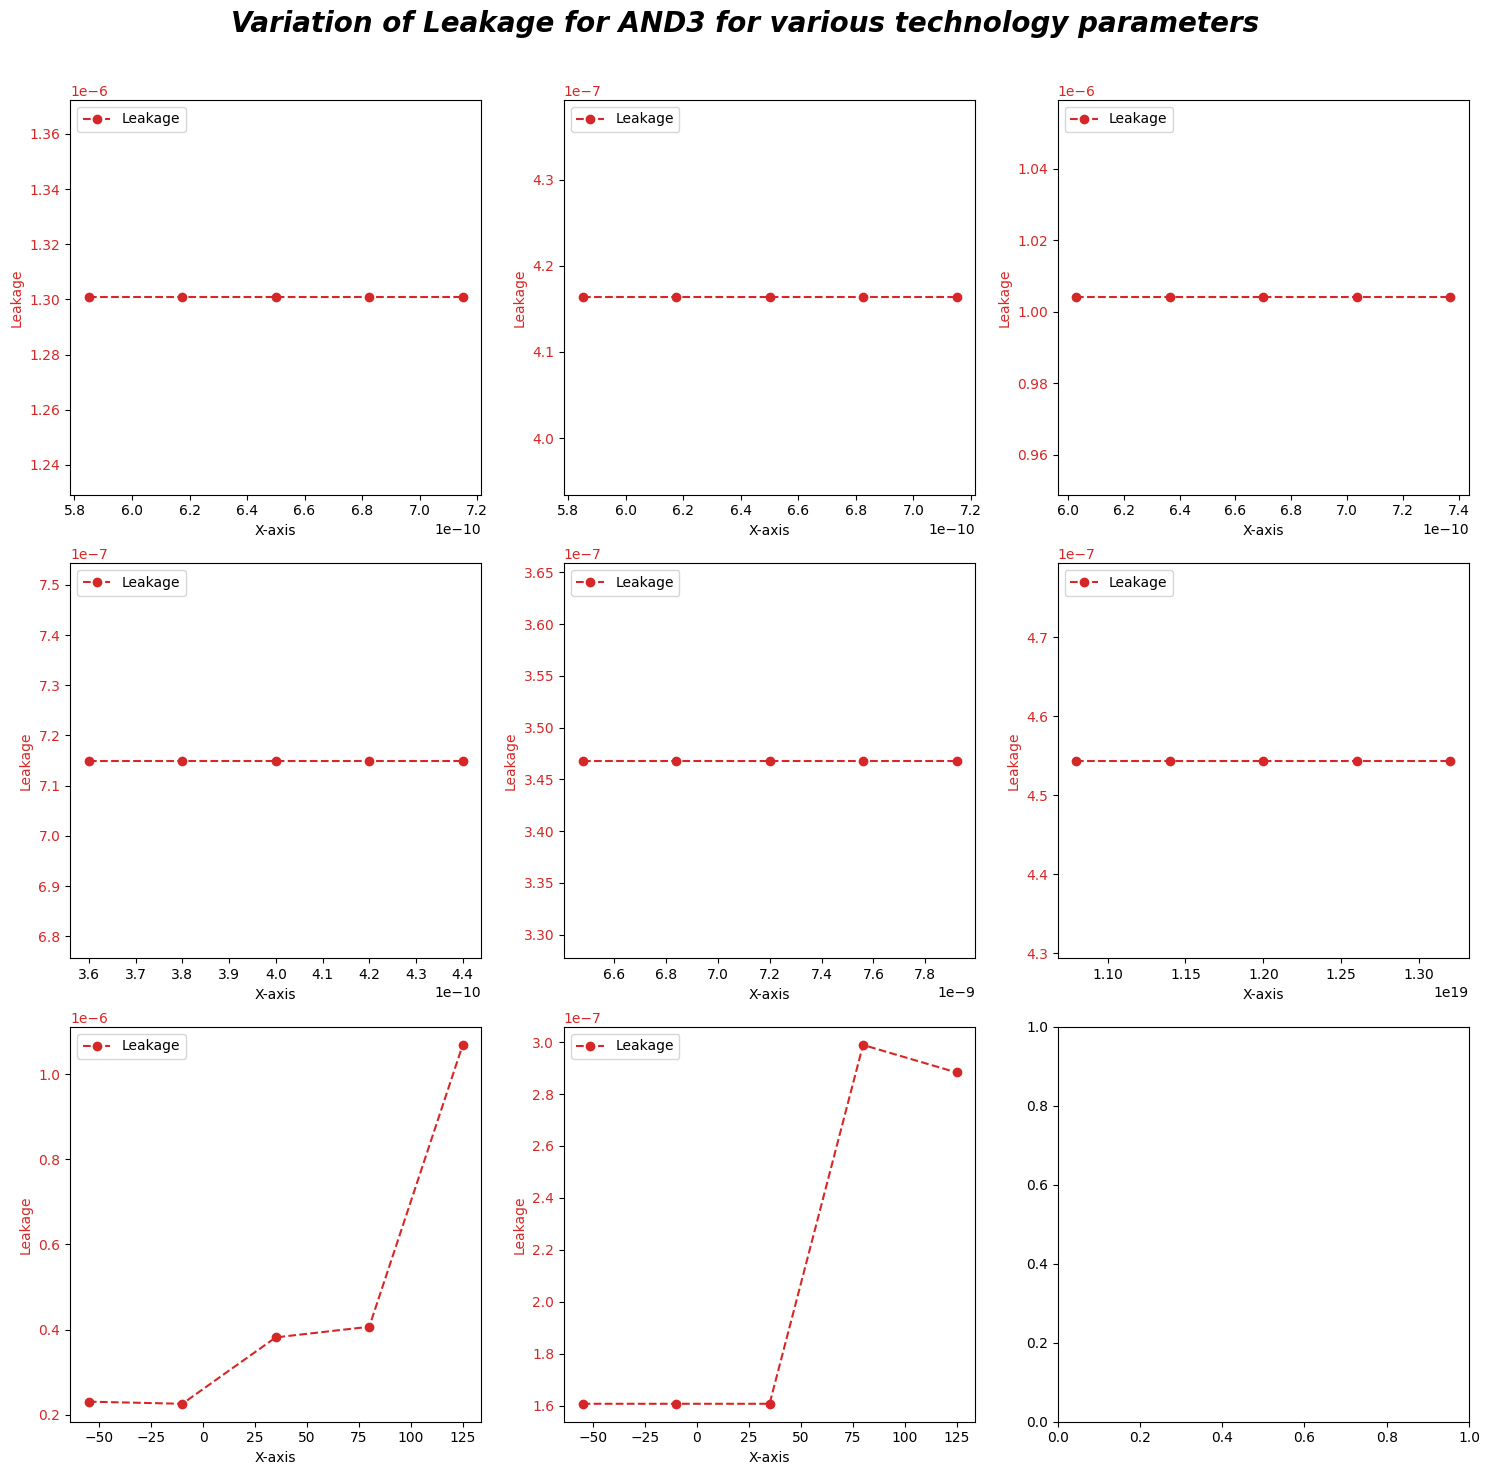

In [84]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data = [
    (axs[0, 0], toxe_list, 'toxe', 'Toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, 'toxm', 'Toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, 'toxref', 'Toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, 'toxp', 'Toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, 'xj', 'Xj', leakage_list_xj),
    (axs[1, 2], ndep_list, 'ndep', 'Ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, 'TEMP', 'Temp', leakage_list_temp),
    (axs[2, 1], temp_list, 'Pvdd', 'Pvdd', leakage_list_pvdd)
]

for ax, x,xlabel, param1, param2 in data:
    plot_leakage(ax, x, param2)

plt.tight_layout()
fig.suptitle('Variation of Leakage for AND3 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.show()


# 5. AND3

Loading the File path

In [85]:
file_path = "AND_3_leakage.csv"  # Provide the path to your CSV file
df_and3_leakage = pd.read_csv(file_path)

## 5.1 Temparature

In [86]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_and3_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)



[8.275073297084955e-07, 8.999058995438505e-07, 1.3895526910069059e-06, 1.335821805392353e-06, 3.581711562784723e-06]


## 5.2 Pvdd

In [87]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_and3_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)



[6.310152269255503e-07, 6.310152269255503e-07, 6.310152269255503e-07, 1.0649535091507647e-06, 1.0024506877736366e-06]


## 5.4 toxe

In [88]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_and3_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)



[3.832605946464904e-06, 3.832605946464904e-06, 3.832605946464904e-06, 3.832605946464904e-06, 3.832605946464904e-06]


## 5.5 toxm

In [89]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_and3_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)


[1.4947829914257083e-06, 1.4947829914257083e-06, 1.4947829914257083e-06, 1.4947829914257083e-06, 1.4947829914257083e-06]


## 5.6 toxref

In [90]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_and3_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)


[2.9645621899263287e-06, 2.9645621899263287e-06, 2.9645621899263287e-06, 2.9645621899263287e-06, 2.9645621899263287e-06]


## 5.7 toxp

In [91]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_and3_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)


[2.3703440266883907e-06, 2.3703440266883907e-06, 2.3703440266883907e-06, 2.3703440266883907e-06, 2.3703440266883907e-06]


## 5.8 xj

In [92]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_and3_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)


[1.2885874370494605e-06, 1.2885874370494605e-06, 1.2885874370494605e-06, 1.2885874370494605e-06, 1.2885874370494605e-06]


## 5.9 ndep

In [93]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_and3_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)


[1.5139279191683166e-06, 1.5139279191683166e-06, 1.5139279191683166e-06, 1.5139279191683166e-06, 1.5139279191683166e-06]


## 5.10 Plotting all plots

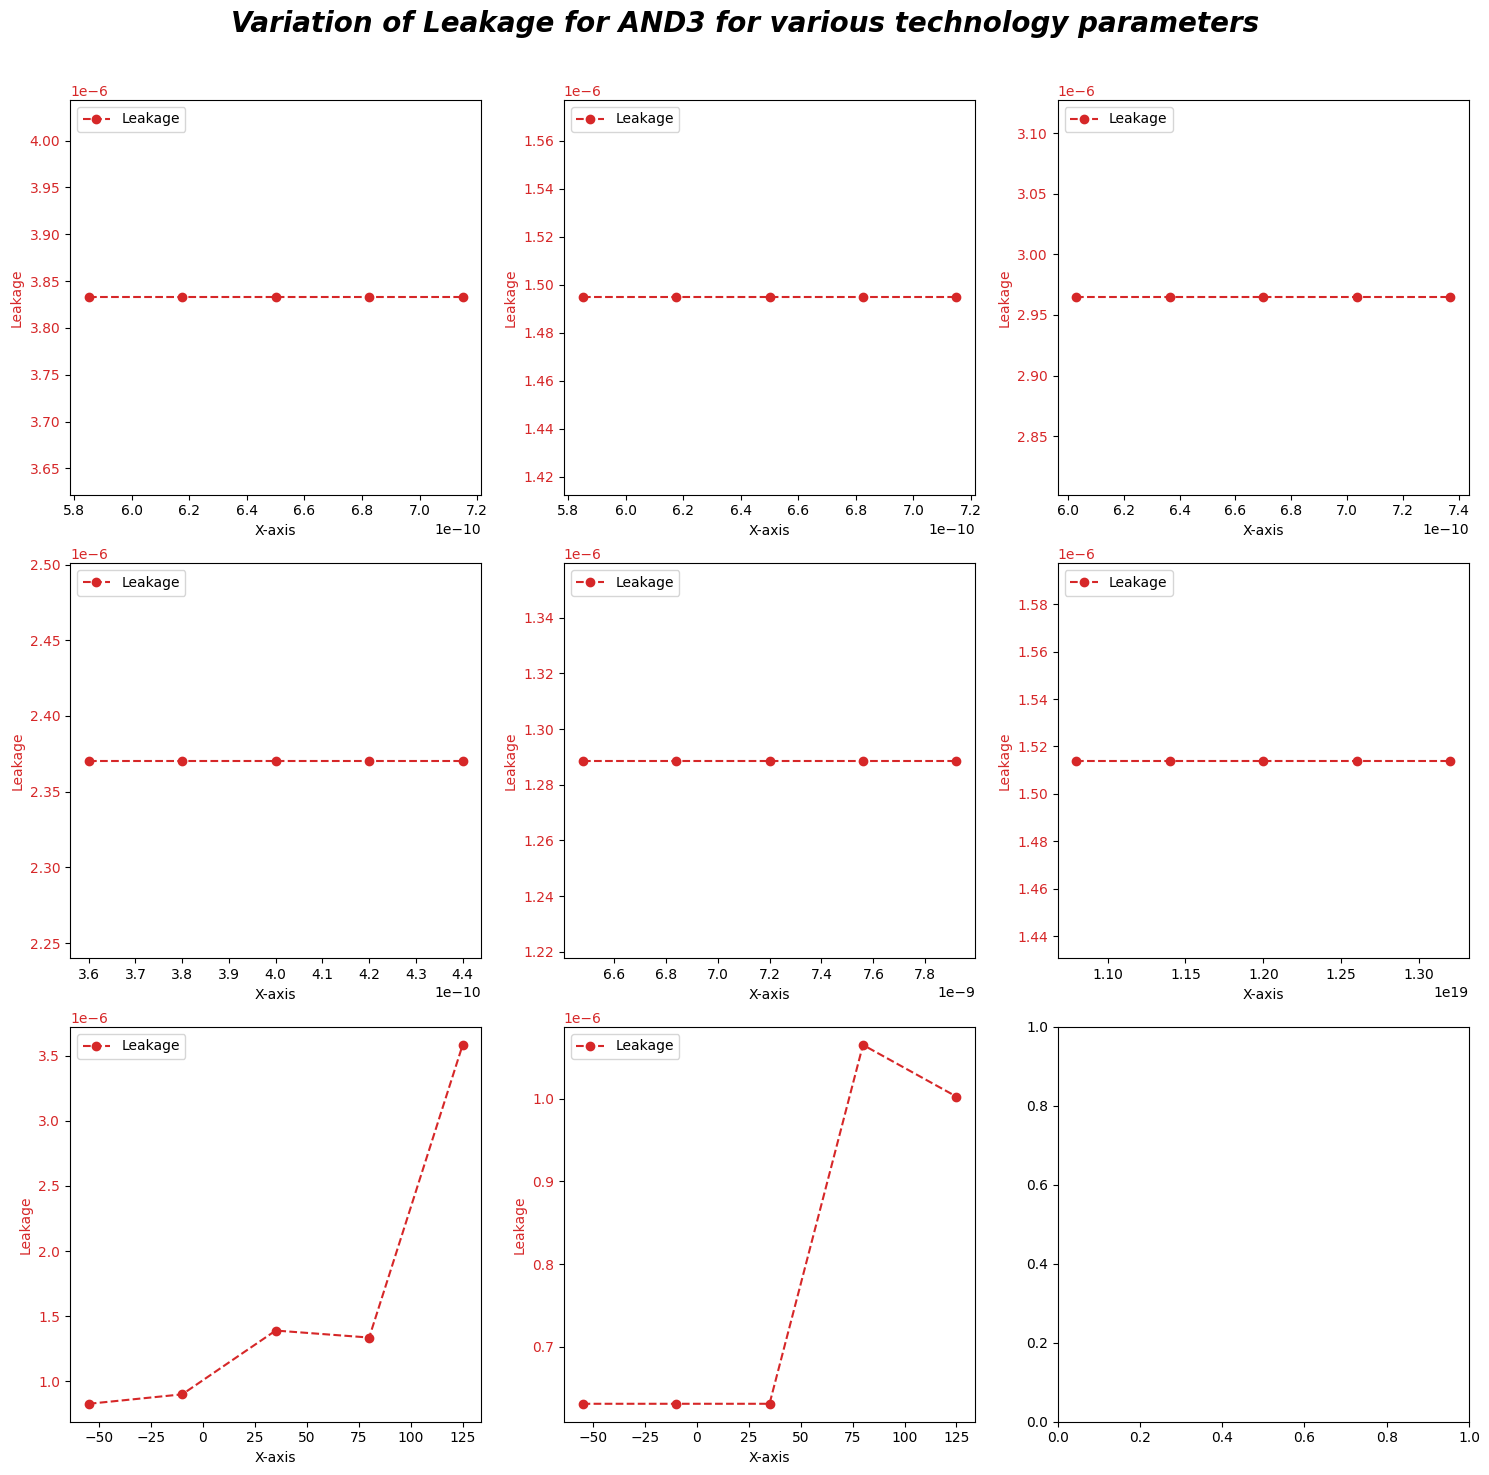

In [94]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data = [
    (axs[0, 0], toxe_list, 'toxe', 'Toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, 'toxm', 'Toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, 'toxref', 'Toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, 'toxp', 'Toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, 'xj', 'Xj', leakage_list_xj),
    (axs[1, 2], ndep_list, 'ndep', 'Ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, 'TEMP', 'Temp', leakage_list_temp),
    (axs[2, 1], temp_list, 'Pvdd', 'Pvdd', leakage_list_pvdd)
]

for ax, x,xlabel, param1, param2 in data:
    plot_leakage(ax, x, param2)

plt.tight_layout()
fig.suptitle('Variation of Leakage for AND3 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.show()


# 6. OR2

Loading the File path

In [95]:
file_path = "OR_2_leakage.csv"  # Provide the path to your CSV file
df_or2_leakage = pd.read_csv(file_path)

## 6.1 Temparature

In [96]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_or2_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)


[6.252042776569564e-07, 6.4113372346973e-07, 1.1457258926380454e-06, 1.6068469372409973e-06, 4.217464623216839e-06]


## 6.2 Pvdd

In [97]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_or2_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)


[5.548932127117851e-07, 5.548932127117851e-07, 5.548932127117851e-07, 9.346509909038022e-07, 8.353111555843646e-07]


## 6.4 toxe

In [98]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_or2_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)


[5.084877019887182e-06, 5.084877019887182e-06, 5.084877019887182e-06, 5.084877019887182e-06, 5.084877019887182e-06]


## 6.5 toxm

In [99]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_or2_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)


[1.26525617787767e-06, 1.26525617787767e-06, 1.26525617787767e-06, 1.26525617787767e-06, 1.26525617787767e-06]


## 6.6 toxref

In [100]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_or2_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)


[3.912323831483945e-06, 3.912323831483945e-06, 3.912323831483945e-06, 3.912323831483945e-06, 3.912323831483945e-06]


## 6.7 toxp

In [101]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_or2_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)


[2.394848083389755e-06, 2.394848083389755e-06, 2.394848083389755e-06, 2.394848083389755e-06, 2.394848083389755e-06]


## 6.8 xj

In [102]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_or2_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)


[1.207686552571103e-06, 1.207686552571103e-06, 1.207686552571103e-06, 1.207686552571103e-06, 1.207686552571103e-06]


## 6.9 ndep

In [103]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_or2_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)


[1.7402663949134509e-06, 1.7402663949134509e-06, 1.7402663949134509e-06, 1.7402663949134509e-06, 1.7402663949134509e-06]


## 6.10 Plotting all plots

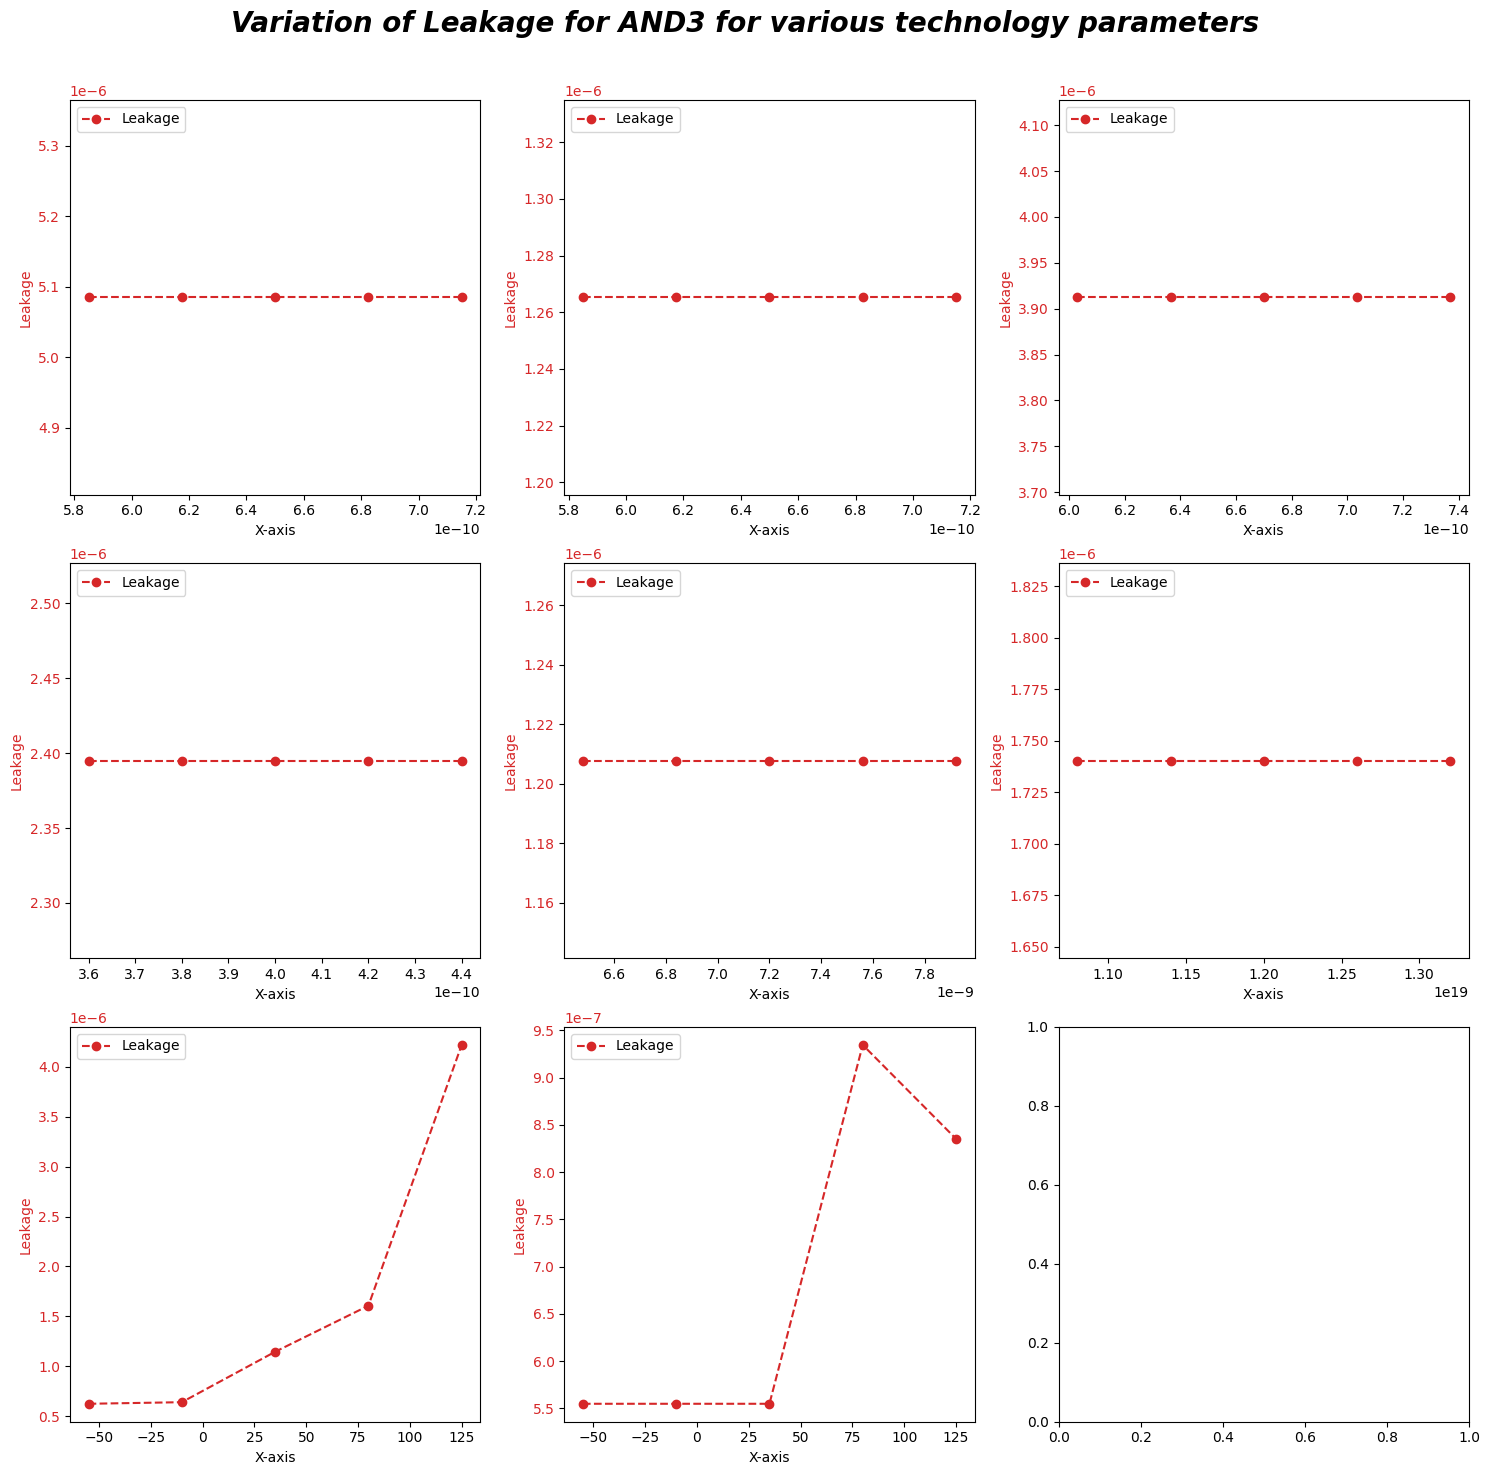

In [104]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data = [
    (axs[0, 0], toxe_list, 'toxe', 'Toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, 'toxm', 'Toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, 'toxref', 'Toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, 'toxp', 'Toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, 'xj', 'Xj', leakage_list_xj),
    (axs[1, 2], ndep_list, 'ndep', 'Ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, 'TEMP', 'Temp', leakage_list_temp),
    (axs[2, 1], temp_list, 'Pvdd', 'Pvdd', leakage_list_pvdd)
]

for ax, x,xlabel, param1, param2 in data:
    plot_leakage(ax, x, param2)

plt.tight_layout()
fig.suptitle('Variation of Leakage for AND3 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.show()


# 7. XOR

Loading the File path

In [105]:
file_path = "XOR_leakage.csv"  # Provide the path to your CSV file
df_xor_leakage = pd.read_csv(file_path)

## 7.1 Temparature

In [106]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_xor_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)


[0.0001567190442822981, 0.00012902879410740407, 9.197619295811809e-05, 0.0001469132411204539, 0.00014182360061208146]


## 7.2 Pvdd

In [107]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_xor_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)


[0.0001242530747690736, 0.0001380785405003499, 0.00014646893362790924, 0.00014646893362790924, 0.00014646893362790924]


## 7.4 toxe

In [108]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_xor_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)


[0.0001077239303667287, 8.458380881703283e-05, 0.00012250428468807065, 0.00013298224614606755, 9.686717702113615e-05]


## 7.5 toxm

In [109]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_xor_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)


[0.00011696914234952683, 0.00015162213683710796, 0.00012023559054249867, 0.00011369522050964589, 0.00016638313839023724]


## 7.6 toxref

In [110]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_xor_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)


[0.00018016419407296258, 0.0001483424353499086, 0.00014129797616048388, 0.00011825493674533875, 0.00012522540955687864]


## 7.7 toxp

In [111]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_xor_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)


[0.00013028384652527723, 0.00011478757468836418, 0.0001435981797055677, 0.00014921324370844135, 0.0001595351216782778]


## 7.8 xj

In [112]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_xor_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)


[0.00013885822342205655, 0.0001872681968182787, 0.00015063048439833946, 0.000140962212632577, 0.00013722595359331002]


## 7.9 ndep

In [113]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_xor_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)


[0.00013970514143362193, 0.00013561785244190847, 0.00013729172745431342, 0.00011049028123822706, 0.00010808134138467451]


## 7.10 Plotting all plots

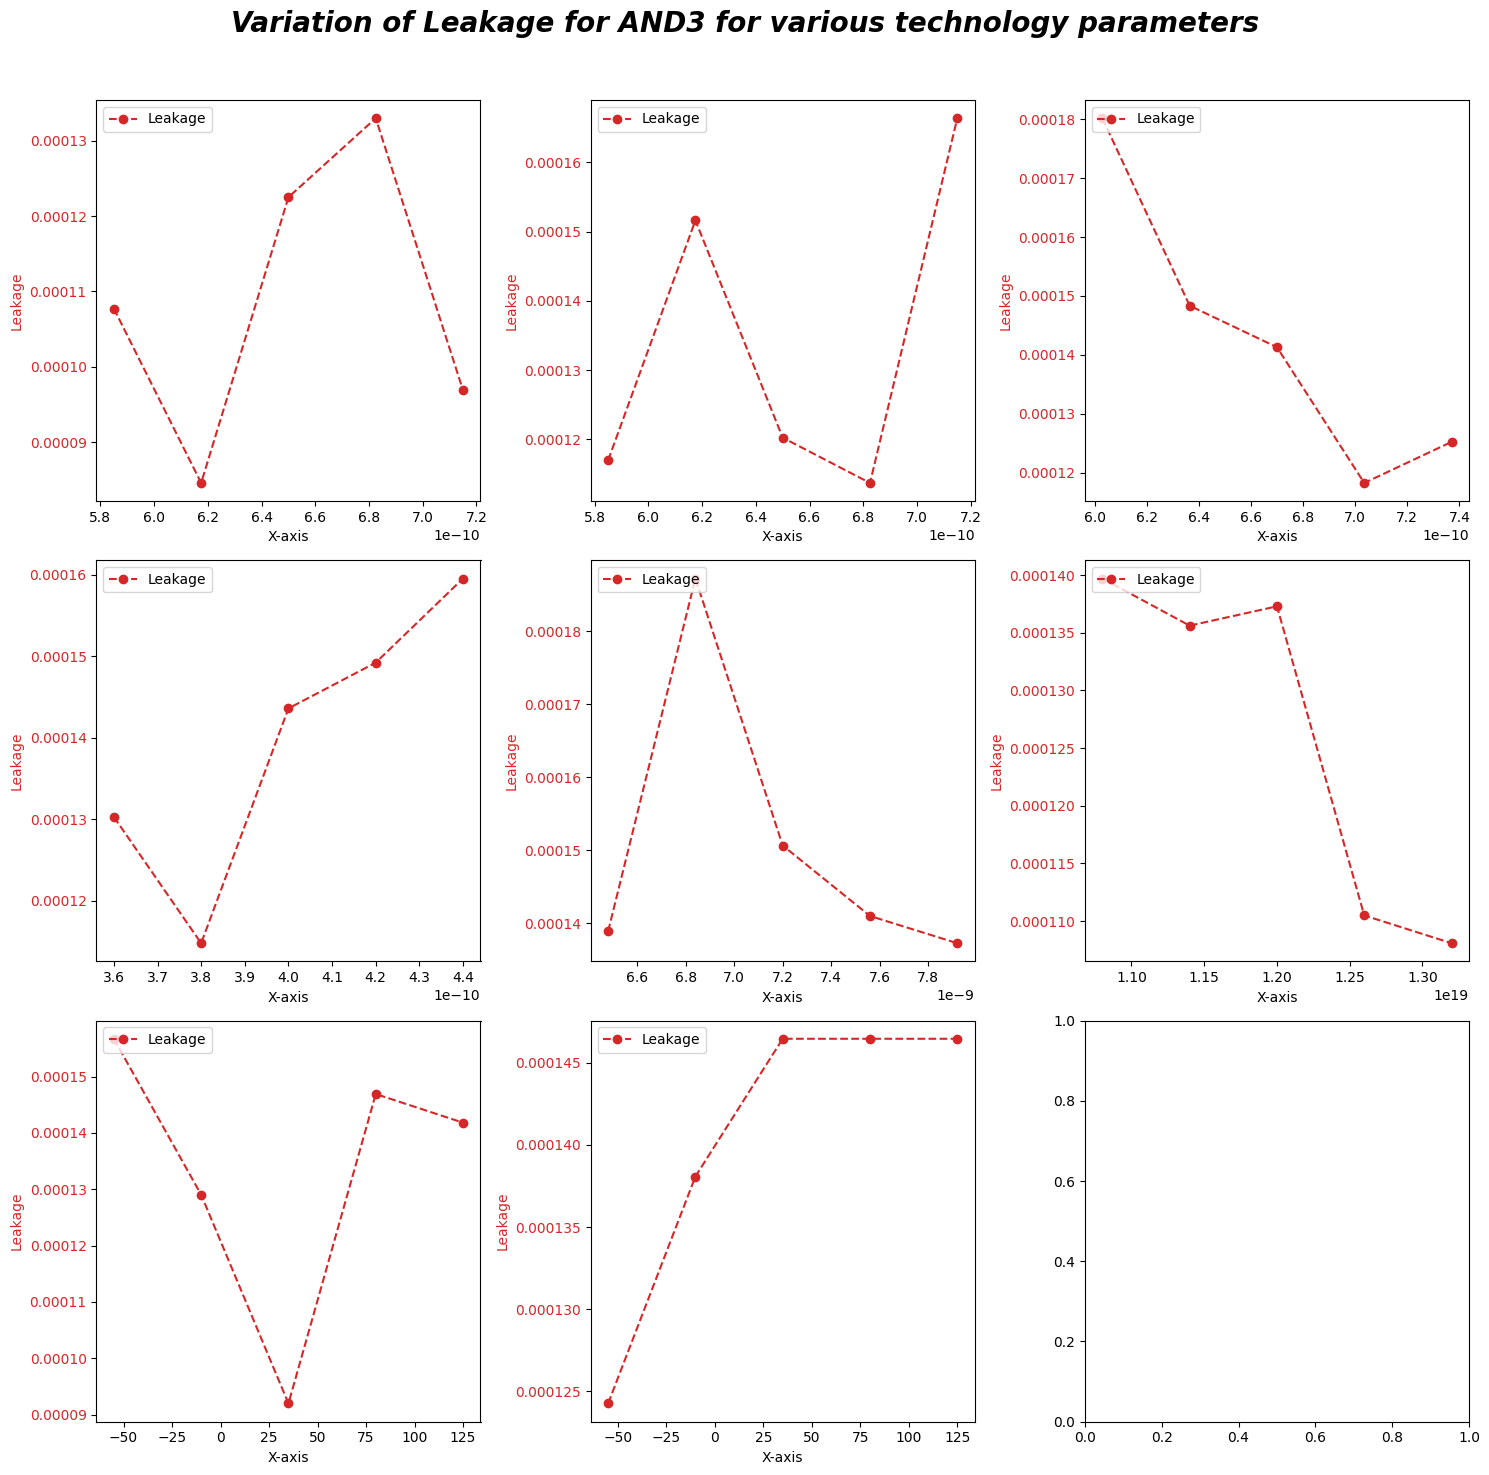

In [114]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data = [
    (axs[0, 0], toxe_list, 'toxe', 'Toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, 'toxm', 'Toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, 'toxref', 'Toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, 'toxp', 'Toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, 'xj', 'Xj', leakage_list_xj),
    (axs[1, 2], ndep_list, 'ndep', 'Ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, 'TEMP', 'Temp', leakage_list_temp),
    (axs[2, 1], temp_list, 'Pvdd', 'Pvdd', leakage_list_pvdd)
]

for ax, x,xlabel, param1, param2 in data:
    plot_leakage(ax, x, param2)

plt.tight_layout()
fig.suptitle('Variation of Leakage for AND3 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.show()


# 9. NAND_2

Loading the File path

In [115]:
file_path = "NAND_2_leakage.csv"  # Provide the path to your CSV file
df_xor_leakage = pd.read_csv(file_path)

## 9.1 Temparature

In [116]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_xor_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)


[4.212146034780237e-07, 4.6365733424855465e-07, 7.193132828650245e-07, 7.048090593069748e-07, 1.9844008594563083e-06]


## 9.2 Pvdd

In [117]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_xor_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)


[3.237983656759624e-07, 3.237983656759624e-07, 3.237983656759624e-07, 5.550467419112705e-07, 5.167764247440047e-07]


## 9.4 toxe

In [118]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_xor_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)


[2.1200741648089386e-06, 2.1200741648089386e-06, 2.1200741648089386e-06, 2.1200741648089386e-06, 2.1200741648089386e-06]


## 9.5 toxm

In [119]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_xor_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)


[7.790720584386751e-07, 7.790720584386751e-07, 7.790720584386751e-07, 7.790720584386751e-07, 7.790720584386751e-07]


## 9.6 toxref

In [120]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_xor_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)


[1.6330242736465192e-06, 1.6330242736465192e-06, 1.6330242736465192e-06, 1.6330242736465192e-06, 1.6330242736465192e-06]


## 9.7 toxp

In [121]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_xor_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)


[1.2865809269780913e-06, 1.2865809269780913e-06, 1.2865809269780913e-06, 1.2865809269780913e-06, 1.2865809269780913e-06]


## 9.8 xj

In [122]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_xor_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)


[6.669048857102639e-07, 6.669048857102639e-07, 6.669048857102639e-07, 6.669048857102639e-07, 6.669048857102639e-07]


## 9.9 ndep

In [123]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_xor_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)


[8.086593977349931e-07, 8.086593977349931e-07, 8.086593977349931e-07, 8.086593977349931e-07, 8.086593977349931e-07]


## 9.10 Plotting all plots

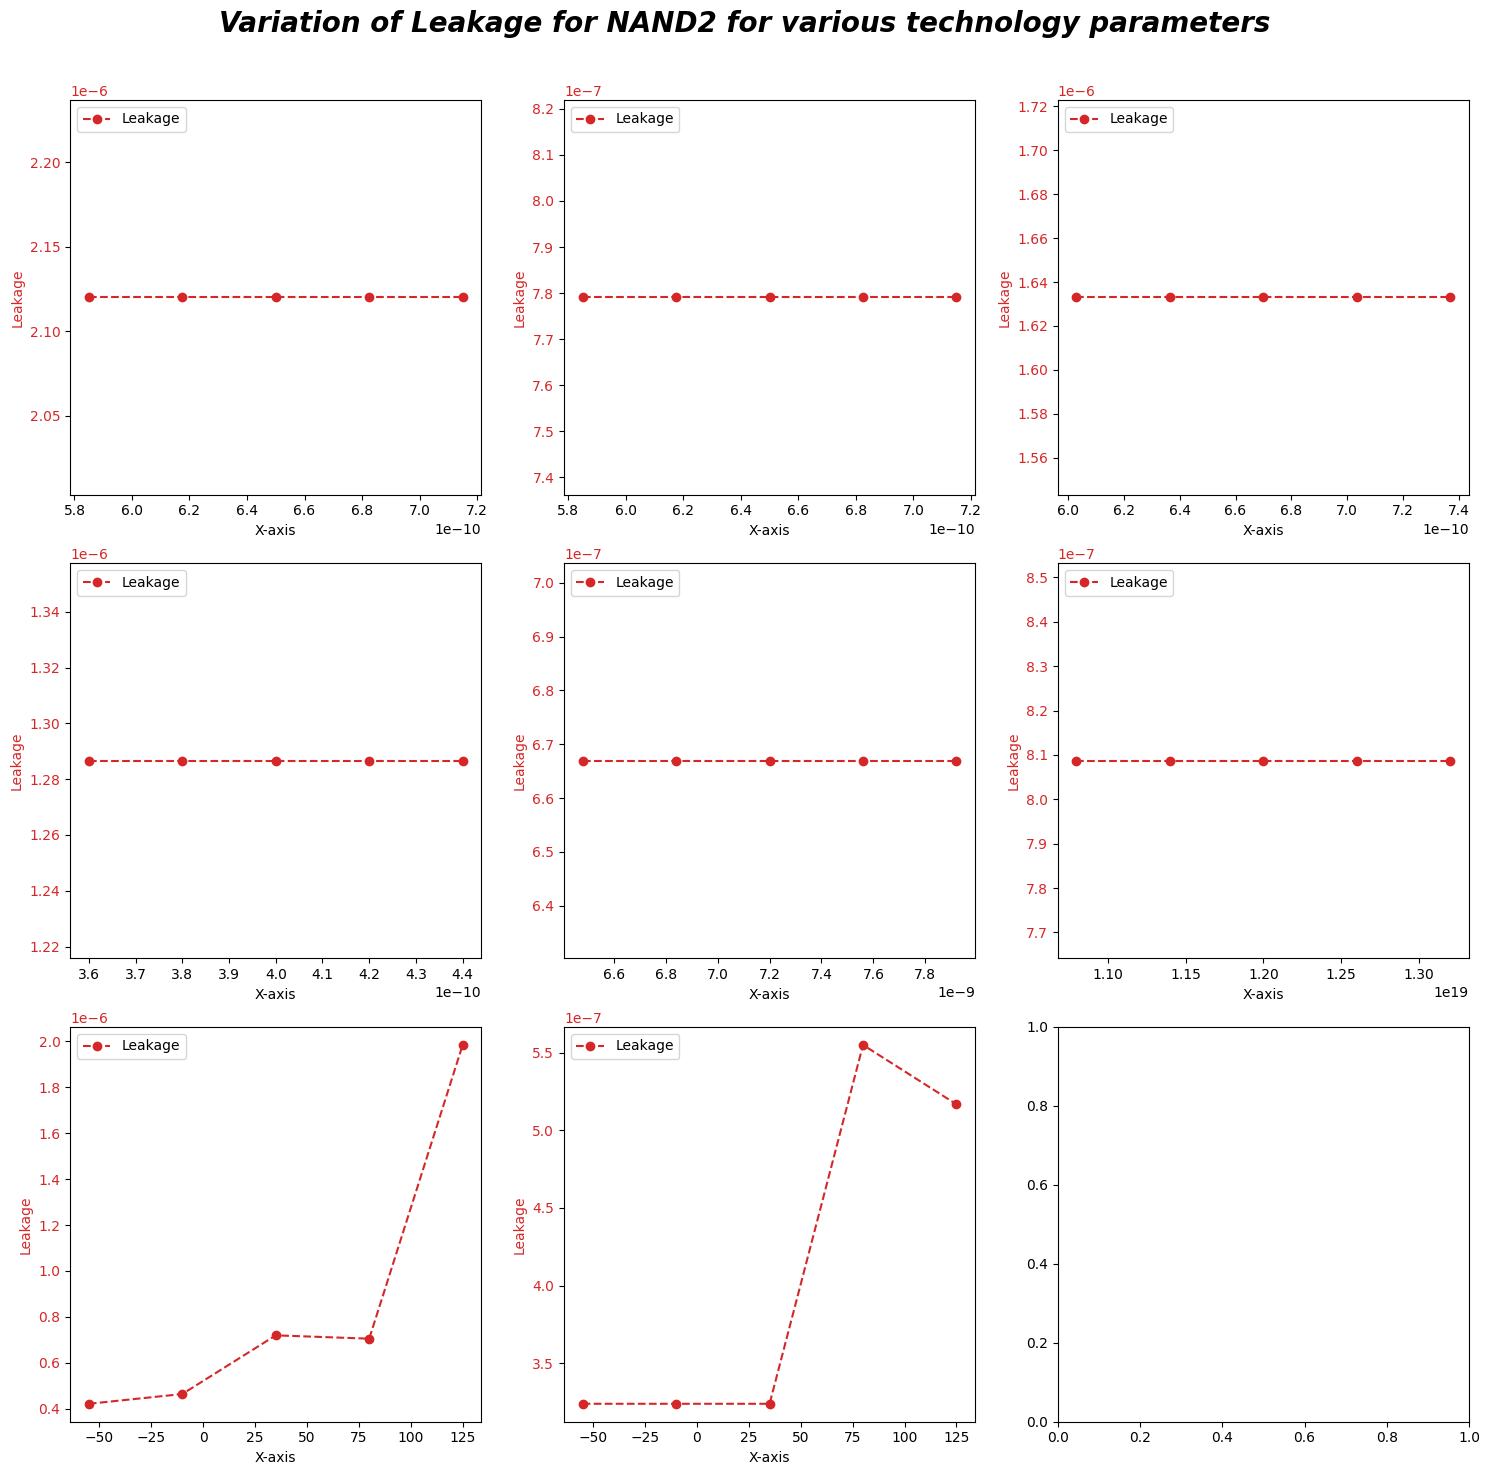

In [124]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data = [
    (axs[0, 0], toxe_list, 'toxe', 'Toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, 'toxm', 'Toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, 'toxref', 'Toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, 'toxp', 'Toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, 'xj', 'Xj', leakage_list_xj),
    (axs[1, 2], ndep_list, 'ndep', 'Ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, 'TEMP', 'Temp', leakage_list_temp),
    (axs[2, 1], temp_list, 'Pvdd', 'Pvdd', leakage_list_pvdd)
]

for ax, x,xlabel, param1, param2 in data:
    plot_leakage(ax, x, param2)

plt.tight_layout()
fig.suptitle('Variation of Leakage for NAND2 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.show()
